<a href="https://colab.research.google.com/github/Girisha-Malni-builds01/Girisha-AI-Practice-Notebook/blob/Supervised-AI-Algorithms/Supervised_AI_Concepts_Girisha's_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Indian GDP Prediction Notebook**

# Dataset

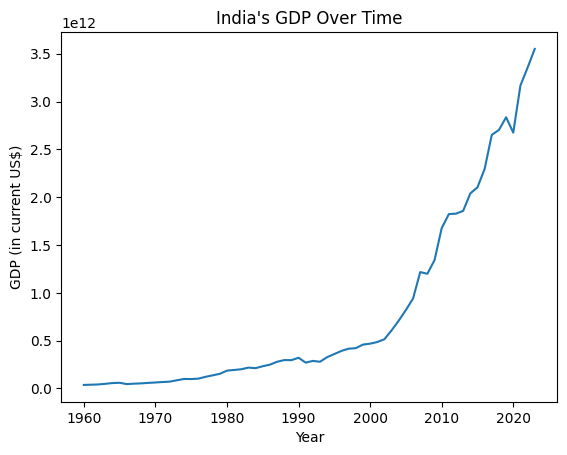

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv"
df = pd.read_csv(url)

india = df[df['Country Name'] == 'India'][['Year','Value']]
india.columns = ['Year','GDP']
india = india[india['Year'] >= 1960]

plt.plot(india['Year'], india['GDP'])
plt.title("India's GDP Over Time")
plt.xlabel("Year")
plt.ylabel("GDP (in current US$)")
plt.show()


# Cost Function (Loss Function)

In [7]:
import numpy as np

X = india['Year'].values.reshape(-1,1)
y = india['GDP'].values

# Hypothesis: GDP ≈ a * Year + b
def predict(a,b,X):
    return a*X + b

def mse(a,b):
    return np.mean((predict(a,b,X) - y)**2)

print("MSE with a=0, b=0:", mse(0,0))


MSE with a=0, b=0: 1.5631808906803254e+24


# Gradient Descent

In [8]:
a, b = 0, 0
lr = 0.0000000001
epochs = 50
n = len(X)

for i in range(epochs):
    y_pred = predict(a,b,X)
    da = (-2/n) * sum(X.flatten() * (y - y_pred))
    db = (-2/n) * sum(y - y_pred)
    a -= lr * da
    b -= lr * db
    if i % 10 == 0:
        print(f"Epoch {i}: Cost={mse(a,b)}")


Epoch 0: Cost=1.560670452414628e+24
Epoch 10: Cost=1.535786760695853e+24
Epoch 20: Cost=1.5112998412390634e+24
Epoch 30: Cost=1.4872033675595128e+24
Epoch 40: Cost=1.463491114047306e+24


# Learning Rate

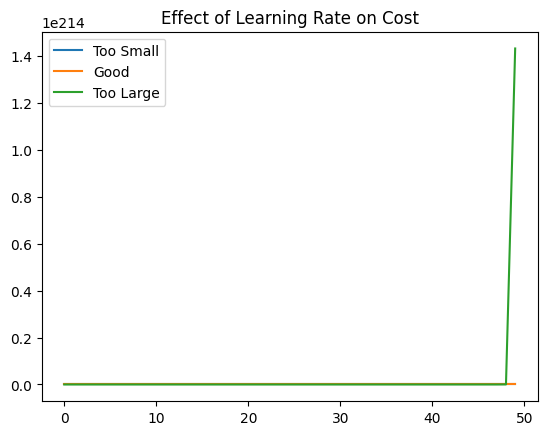

In [9]:
def gradient_descent(lr):
    a, b = 0, 0
    costs = []
    for i in range(50):
        y_pred = predict(a,b,X)
        da = (-2/n) * sum(X.flatten() * (y - y_pred))
        db = (-2/n) * sum(y - y_pred)
        a -= lr * da
        b -= lr * db
        costs.append(mse(a,b))
    return costs

plt.plot(gradient_descent(1e-15), label="Too Small")
plt.plot(gradient_descent(1e-9), label="Good")
plt.plot(gradient_descent(1e-5), label="Too Large")
plt.legend(); plt.title("Effect of Learning Rate on Cost"); plt.show()


# Feature Engineering

In [10]:
india['Year2'] = india['Year']**2


# Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
X_scaled = scaler.fit_transform(india[['Year','Year2']])

model = LinearRegression()
model.fit(X_scaled, y)
print("MSE after scaling:", mean_squared_error(y, model.predict(X_scaled)))


MSE after scaling: 3.802134132815891e+22


# **Predictions**

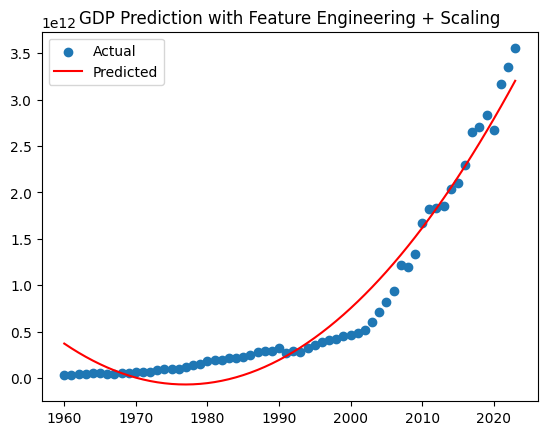

In [12]:
plt.scatter(india['Year'], y, label="Actual")
plt.plot(india['Year'], model.predict(X_scaled), color='red', label="Predicted")
plt.legend(); plt.title("GDP Prediction with Feature Engineering + Scaling")
plt.show()
